<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

<CENTER><h1>Searching for the Higgs boson in the H&#8594;&gamma;&gamma; channel</h1></CENTER>


SM Higgs signal Feynman diagram:
<CENTER><img src="../../images/Figures_FeynmanHprod.png" style="width:30%"></CENTER>

**Introduction**
Let's take a current ATLAS Open Data sample and create a histogram:

In [1]:
import ROOT
from ROOT import TMath
import time

In [2]:
%jsroot on

In [3]:
# install required packages
%pip install --user atlasopenmagic

  Using cached atlasopenmagic-1.4.2-py3-none-any.whl.metadata (5.2 kB)
Using cached atlasopenmagic-1.4.2-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Now we have to do a little bit of work to make sure that atlasopenmagic is available in our python path
# This is because SWAN by default does not include the local package installation area in the PYTHONPATH
# Again, this is not necessary on binder or colab
import sys
import os
sys.path += [ f'{os.environ["HOME"]}/.local/lib/python{sys.version_info.major}.{sys.version_info.minor}/site-packages' ]

# Now we can safely import atlasopenmagic
import atlasopenmagic as atom

In [5]:
# Now let's see what releases are available to us
atom.available_releases()

Available releases:
2016e-8tev        2016 Open Data for education release of 8 TeV proton-proton collisions (https://opendata.cern.ch/record/3860).
2020e-13tev       2020 Open Data for education release of 13 TeV proton-proton collisions (https://cern.ch/2r7xt).
2024r-pp          2024 Open Data for research release for proton-proton collisions (https://opendata.cern.record/80020).
2024r-hi          2024 Open Data for research release for heavy-ion collisions (https://opendata.cern.ch/record/80035).
2025e-13tev-beta  2025 Open Data for education and outreach beta release for 13 TeV proton-proton collisions(https://opendata.cern.ch/record/93910).
2025r-evgen       2025 Open Data for research release for event generation (https://opendata.cern.ch/record/160000).


{'2016e-8tev': '2016 Open Data for education release of 8 TeV proton-proton collisions (https://opendata.cern.ch/record/3860).',
 '2020e-13tev': '2020 Open Data for education release of 13 TeV proton-proton collisions (https://cern.ch/2r7xt).',
 '2024r-pp': '2024 Open Data for research release for proton-proton collisions (https://opendata.cern.record/80020).',
 '2024r-hi': '2024 Open Data for research release for heavy-ion collisions (https://opendata.cern.ch/record/80035).',
 '2025e-13tev-beta': '2025 Open Data for education and outreach beta release for 13 TeV proton-proton collisions(https://opendata.cern.ch/record/93910).',
 '2025r-evgen': '2025 Open Data for research release for event generation (https://opendata.cern.ch/record/160000).'}

In [6]:
# And let's plan to use the latest release of Open Data for Outreach and Education
atom.set_release('2025e-13tev-beta')

Fetching and caching all metadata for release: 2025e-13tev-beta...
Successfully cached 374 datasets.
Active release: 2025e-13tev-beta. (Datasets path: REMOTE)


In [7]:
start = time.time()

In [8]:
data_chain = ROOT.TChain("analysis")
file_paths = atom.get_urls(key='data', skim='GamGam', protocol='root') #cahe=True for https
#file_paths = atom.get_urls(key='data', skim='GamGam', protocol='https', cache=True)
#file_paths = atom.get_urls('data', 'GamGam', protocol='https', cache=True)
print(len(file_paths))
print(file_paths)

16
['root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodD.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodE.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodF.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodG.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodH.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodJ.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data16_periodA.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data16_periodB.GamGam.root', 'root://eospublic.cern.ch:1094//eos/opendata/atlas/r

In [9]:
data_chain = ROOT.TChain("analysis")

max_samples = 16

for name_sample in file_paths[:max_samples]:
    data_chain.Add(name_sample)
    print(f"Processed sample: "+ name_sample)

#data_chain.Add(file_paths[1])
n_entries = data_chain.GetEntries()
print(f"Number of entries in the chain: {n_entries}")

Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodD.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodE.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodF.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodG.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodH.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data15_periodJ.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/rucio/opendata/ODEO_FEB2025_v0_GamGam_data16_periodA.GamGam.root
Processed sample: root://eospublic.cern.ch:1094//eos/opendata/atlas/r

In [10]:
canvas = ROOT.TCanvas("Canvas","cz",800,600)

Now we're going to extract the photons variables

In [11]:
#Invariant mass histograms definition
hist = ROOT.TH1F("h_M_Hyy","Diphoton invariant-mass ; Invariant Mass m_{yy} [GeV] ; events",60,100,160)

Here we're filling the variables defined above with the content of those inside the input ntuples.

We're creating a histogram for this example. The plan is to fill them with events.

We are selecting below a simple look for them.

The Higgs boson analysis implemented here considers Higgs boson decays into a photon-photon pair. The event selection criteria are:

In [12]:
# Cut on the photon reconstruction quality
def cut_photon_reconstruction(photon_isTightID):
    # Only the events which have True for both photons are kept
    return (photon_isTightID[0]==True) and (photon_isTightID[1]==True)

# Cut on the transverse momentum
def cut_photon_pt(photon_pt):
# Only the events where photon_pt[0] > 50 GeV and photon_pt[1] > 30 GeV are kept
    return (photon_pt[0] > 50) and (photon_pt[1] > 30)

# Cut on the energy isolation
def cut_isolation_pt(photon_ptcone20, photon_pt):
# Only the events where the calorimeter isolation is less than 5.5% are kept
    return ((photon_ptcone20[0]/photon_pt[0]) < 0.055) and ((photon_ptcone20[1]/photon_pt[1]) < 0.055)

# Cut on the pseudorapidity in barrel/end-cap transition region
def cut_photon_eta_transition(photon_eta):
# Only the events where modulus of photon_eta is outside the range 1.37 to 1.52 are kept
    condition_0 = (TMath.Abs(photon_eta[0]) < 1.37) or (TMath.Abs(photon_eta[0]) > 1.52)
    condition_1 = (TMath.Abs(photon_eta[1]) < 1.37) or (TMath.Abs(photon_eta[1]) > 1.52)
    return condition_0 and condition_1

# This function calculates the invariant mass of the 2-photon state
def calc_mass(photon_pt, photon_eta, photon_phi, photon_e):    
    Photon_1 = ROOT.TLorentzVector()
    Photon_2 = ROOT.TLorentzVector()

    Photon_1.SetPtEtaPhiE(photon_pt[0], photon_eta[0], photon_phi[0], photon_e[0])
    Photon_2.SetPtEtaPhiE(photon_pt[1], photon_eta[1], photon_phi[1], photon_e[1])
    ## Adding the two TLorentz vectors
    Photon_12 = Photon_1 + Photon_2
    inv_mass_Hyy = Photon_12.M()
    return inv_mass_Hyy

# Cut on null diphoton invariant mass
def cut_mass(invariant_mass):
    return (invariant_mass != 0)

# Cut on diphoton invariant mass based isolation
# Only the events where the invididual photon invariant mass based isolation is larger than 35% are kept
def cut_iso_mass(photon_pt, invariant_mass):
    return ((photon_pt[0]/invariant_mass) > 0.35) and ((photon_pt[1]/invariant_mass) > 0.35)

In [13]:
n = 0
accepted_events = 0
for event in data_chain:
    n += 1
    ## printing the evolution in number of events
    if(n%1000000==0):
        print(n)
    # Cut on the photon reconstruction quality
    if(cut_photon_reconstruction(data_chain.photon_isTightID)):
        # Cut: pT cut - photon 1 has pT > 50 GeV and photon 2 has pT > 30 GeV
        if(cut_photon_pt(data_chain.photon_pt)):
            # Only the events where the calorimeter isolation is less than 5.5% are kept
            if(cut_isolation_pt(data_chain.photon_ptcone20, data_chain.photon_pt)):
                # Cut on the pseudorapidity in barrel/end-cap transition region
                if(cut_photon_eta_transition(data_chain.photon_eta)):
                    inv_mass_Hyy = calc_mass(data_chain.photon_pt, data_chain.photon_eta, \
                                             data_chain.photon_phi, data_chain.photon_e)
                    # Cut on null diphoton invariant mass
                    if(cut_mass(inv_mass_Hyy)):
                        # Cut on diphoton invariant mass based isolation. Only the events where 
                        # the invididual photon invariant mass based isolation is larger than 35% are kept
                        if(cut_iso_mass(data_chain.photon_pt, inv_mass_Hyy)):
                            ## Filling with the mass of the gamma-gamma system
                            hist.Fill(inv_mass_Hyy)
                            accepted_events+=1
        
print(f"Number of events: {n_entries}")
print(f"Number of events passing the event selection: {accepted_events}")

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
Number of events: 36564144
Number of events passing the event selection: 550057


#### Final plot

In [14]:
import numpy as np # # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
from matplotlib.ticker import MaxNLocator,AutoMinorLocator # for minor ticks
from lmfit.models import PolynomialModel, GaussianModel # for the signal and background fits
import vector #to use vectors
import requests # for HTTP access
import aiohttp # HTTP client support

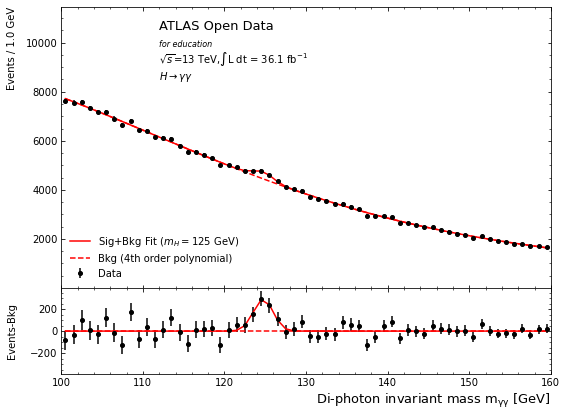

In [15]:
# -----------------------
# Extract data from ROOT hist
# -----------------------
nbins = hist.GetNbinsX()
bin_edges = np.array([hist.GetBinLowEdge(i+1) for i in range(nbins)] + [hist.GetBinLowEdge(nbins+1)])
bin_centres = np.array([hist.GetBinCenter(i+1) for i in range(nbins)])

data_x = np.array([hist.GetBinContent(i+1) for i in range(nbins)])
data_x_errors = np.array([hist.GetBinError(i+1) for i in range(nbins)])

# For consistency with the original code
xmin = bin_edges[0]
xmax = bin_edges[-1]
step_size = hist.GetBinWidth(1)

# -----------------------
# Fit model (poly + gaussian)
# -----------------------
polynomial_mod = PolynomialModel(4)   # 4th order polynomial
gaussian_mod = GaussianModel()

pars = polynomial_mod.guess(data_x, x=bin_centres, c0=data_x.max(), c1=0, c2=0, c3=0, c4=0)
pars += gaussian_mod.guess(data_x, x=bin_centres, amplitude=100, center=125, sigma=2)

model = polynomial_mod + gaussian_mod
out = model.fit(data_x, pars, x=bin_centres, weights=1/np.where(data_x_errors==0, 1, data_x_errors))

# -----------------------
# Background extraction
# -----------------------
params_dict = out.params.valuesdict() # get the parameters from the fit to data
c0 = params_dict['c0'] # c0 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c1 = params_dict['c1'] # c1 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c2 = params_dict['c2'] # c2 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c3 = params_dict['c3'] # c3 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4
c4 = params_dict['c4'] # c4 of c0 + c1*x + c2*x^2 + c3*x^3 + c4*x^4

background = c0 + c1*bin_centres + c2*bin_centres**2 + c3*bin_centres**3 + c4*bin_centres**4
signal_x = data_x - background

# -----------------------
# Main plot
# -----------------------
plt.figure(figsize=(8,6))

plt.axes([0.1,0.3,0.85,0.65])
main_axes = plt.gca()

main_axes.errorbar(bin_centres, data_x, yerr=data_x_errors,
                   fmt='ko', label='Data', markersize=4)

main_axes.plot(bin_centres, out.best_fit, '-r', label='Sig+Bkg Fit ($m_H=125$ GeV)')
main_axes.plot(bin_centres, background, '--r', label='Bkg (4th order polynomial)')

main_axes.set_xlim(xmin, xmax)
main_axes.xaxis.set_minor_locator(AutoMinorLocator())
main_axes.tick_params(which='both', direction='in', top=True, labelbottom=False, right=True)
main_axes.set_ylabel(f'Events / {step_size:.1f} GeV', ha='right')
main_axes.set_ylim(0, np.amax(data_x)*1.5)
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
main_axes.yaxis.get_major_ticks()[0].set_visible(False)

plt.text(0.2,0.92,'ATLAS Open Data', transform=main_axes.transAxes, fontsize=13)
plt.text(0.2,0.86,'for education', transform=main_axes.transAxes, style='italic', fontsize=8)

lumi = 36.1
fraction = 1.0  # <-- set this properly
lumi_used = str(lumi*fraction)
plt.text(0.2,0.8, r'$\sqrt{s}$=13 TeV,$\int$L dt = '+lumi_used+' fb$^{-1}$', transform=main_axes.transAxes)
plt.text(0.2,0.74, r'$H \rightarrow \gamma\gamma$', transform=main_axes.transAxes)

main_axes.legend(frameon=False, loc='lower left')

# -----------------------
# Data-Bkg plot
# -----------------------
plt.axes([0.1,0.1,0.85,0.2])
sub_axes = plt.gca()
sub_axes.yaxis.set_major_locator(MaxNLocator(nbins='auto', symmetric=True))

sub_axes.errorbar(bin_centres, signal_x, yerr=data_x_errors, fmt='ko', markersize=4)
sub_axes.plot(bin_centres, out.best_fit-background, '-r')
sub_axes.plot(bin_centres, background-background, '--r')

sub_axes.set_xlim(xmin, xmax)
sub_axes.xaxis.set_minor_locator(AutoMinorLocator())
sub_axes.set_xlabel(r'Di-photon invariant mass $\mathrm{m_{\gamma\gamma}}$ [GeV]', x=1, ha='right', fontsize=13)
sub_axes.tick_params(which='both', direction='in', top=True, right=True)
sub_axes.yaxis.set_minor_locator(AutoMinorLocator())
sub_axes.set_ylabel('Events-Bkg')

main_axes.yaxis.set_label_coords(-0.09, 1)
sub_axes.yaxis.set_label_coords(-0.09, 0.5)

plt.show()

In [16]:
print(hist.Integral())

250125.0


In [17]:
# =======================
# Main Pad (Data + Fit)
# =======================
mainPad = ROOT.TPad("mainPad", "mainPad", 0, 0.3, 1, 1.0)
mainPad.SetBottomMargin(0)
mainPad.Draw()
mainPad.cd()

# Style histogram
hist.SetMarkerStyle(20)
hist.SetMarkerSize(0.8)
hist.SetLineColor(ROOT.kBlack)
hist.SetStats(0)

# Define signal + background (Gaussian + 4th order polynomial)
sigPlusBkg = ROOT.TF1("sigPlusBkg", "gaus(0) + pol4(3)", 100, 160)
sigPlusBkg.SetLineColor(ROOT.kRed)
sigPlusBkg.SetLineStyle(1)

# --- Improved initial guesses ---
peak_bin   = hist.GetMaximumBin()
peak_value = hist.GetBinContent(peak_bin)
peak_pos   = hist.GetBinCenter(peak_bin)

sigPlusBkg.SetParameter(0, peak_value)          # Gaussian amplitude
# sigPlusBkg.SetParameter(1, peak_pos)            # Gaussian mean
# sigPlusBkg.SetParameter(2, hist.GetRMS() / 2.0) # Gaussian sigma
sigPlusBkg.SetParameter(1, 125)            # Gaussian mean
sigPlusBkg.SetParameter(2, 2.0) # Gaussian sigma

for i in range(5):
    sigPlusBkg.SetParameter(3 + i, 0.0)         # Polynomial coefficients

# Perform weighted fit (S=silent, R=use range, Q=quiet, W=weights)
hist.Fit("sigPlusBkg", "SRW")

# Extract polynomial (background) parameters from global fit
bkgOnly = ROOT.TF1("bkgOnly", "pol4", 100, 160)
bkgOnly.SetLineColor(ROOT.kRed)
bkgOnly.SetLineStyle(2)
for i in range(5):
    bkgOnly.SetParameter(i, sigPlusBkg.GetParameter(3 + i))

# Draw results
hist.Draw("E1")
sigPlusBkg.Draw("same")
bkgOnly.Draw("same")

# Legend
legend = ROOT.TLegend(0.55, 0.65, 0.9, 0.85)
legend.AddEntry(hist, "Data", "lep")
legend.AddEntry(sigPlusBkg, "Sig+Bkg Fit (m_{H}=125 GeV)", "l")
legend.AddEntry(bkgOnly, "Bkg (4th order polynomial)", "l")
legend.Draw()

# Labels
latex = ROOT.TLatex()
latex.SetTextSize(0.04)
latex.DrawLatexNDC(0.2, 0.85, "ATLAS Open Data")
latex.DrawLatexNDC(0.2, 0.8, "#sqrt{s}=13 TeV, #int L dt = 36 fb^{-1}")
latex.DrawLatexNDC(0.2, 0.75, "H #rightarrow #gamma#gamma")

canvas.cd()

# =======================
# Residual Pad (Data-Bkg vs Fit-Bkg)
# =======================
residPad = ROOT.TPad("residPad", "residPad", 0, 0.05, 1, 0.3)
residPad.SetTopMargin(0)
residPad.SetBottomMargin(0.3)
residPad.Draw()
residPad.cd()

nBins = hist.GetNbinsX()
residuals = ROOT.TH1F("residuals", "", nBins, 100, 160)

for i in range(1, nBins + 1):
    dataValue = hist.GetBinContent(i)
    bkgValue  = bkgOnly.Eval(hist.GetBinCenter(i))
    residualValue = dataValue - bkgValue       # data - bkg
    residuals.SetBinContent(i, residualValue)
    residuals.SetBinError(i, hist.GetBinError(i))

# Style residuals
residuals.SetMarkerStyle(20)
residuals.SetMarkerSize(0.8)
residuals.SetLineColor(ROOT.kBlack)

residuals.GetYaxis().SetTitle("Events - Bkg")
residuals.GetYaxis().SetTitleSize(0.07)
residuals.GetYaxis().SetTitleOffset(0.5)
residuals.GetYaxis().SetLabelSize(0.07)
residuals.GetXaxis().SetTitle("di-photon invariant mass m_{#gamma#gamma} [GeV]")
residuals.GetXaxis().SetTitleSize(0.07)
residuals.GetXaxis().SetLabelSize(0.07)

# Draw residuals (data - bkg)
residuals.Draw("E1")

# Fit - bkg (Gaussian part only)
gaussianResidual = ROOT.TF1("gaussianResidual", "gaus(0)", 100, 160)
gaussianResidual.SetParameters(sigPlusBkg.GetParameter(0),
                               sigPlusBkg.GetParameter(1),
                               sigPlusBkg.GetParameter(2))
gaussianResidual.SetLineColor(ROOT.kRed)
gaussianResidual.SetLineStyle(1)
gaussianResidual.Draw("same")

# Zero line
zeroLine = ROOT.TLine(100, 0, 160, 0)
zeroLine.SetLineColor(ROOT.kRed)
zeroLine.SetLineStyle(2)
zeroLine.Draw("same")

canvas.Draw()

"""
# =======================
# Residual Pad (Data-Bkg)
# =======================
residPad = ROOT.TPad("residPad", "residPad", 0, 0.05, 1, 0.3)
residPad.SetTopMargin(0)
residPad.SetBottomMargin(0.3)
residPad.Draw()
residPad.cd()

# Residuals (absolute difference, like matplotlib)
nBins = hist.GetNbinsX()
residuals = ROOT.TH1F("residuals", "", nBins, 100, 160)

for i in range(1, nBins + 1):
    dataValue = hist.GetBinContent(i)
    bkgValue  = bkgOnly.Eval(hist.GetBinCenter(i))
    # error = hist.GetBinError(i)
    
    residualValue = (dataValue - bkgValue)  # absolute diff
    # residualValue = (dataValue - bkgValue) / error  # absolute diff
    residuals.SetBinContent(i, residualValue)
    residuals.SetBinError(i, hist.GetBinError(i))
    #residuals.SetBinContent(i, residualValue)  # Set residual (Data - Bkg)
    
# Style residuals
residuals.SetMarkerStyle(20)
residuals.SetMarkerSize(0.8)
residuals.SetLineColor(ROOT.kBlack)

residuals.GetYaxis().SetTitle("Events - Bkg")
residuals.GetYaxis().SetTitleSize(0.07)
residuals.GetYaxis().SetTitleOffset(0.5)
residuals.GetYaxis().SetLabelSize(0.07)
residuals.GetXaxis().SetTitle("di-photon invariant mass m_{#gamma#gamma} [GeV]")
residuals.GetXaxis().SetTitleSize(0.07)
residuals.GetXaxis().SetLabelSize(0.07)

# Draw residuals
residuals.Draw("E1")

# Signal (fit - bkg)
gaussianResidual = ROOT.TF1("gaussianResidual", "gaus(0)", 100, 160)
gaussianResidual.SetParameters(sigPlusBkg.GetParameter(0),
                               sigPlusBkg.GetParameter(1),
                               sigPlusBkg.GetParameter(2))
gaussianResidual.SetLineColor(ROOT.kRed)
gaussianResidual.SetLineStyle(1)
gaussianResidual.Draw("same")

# Zero line
zeroLine = ROOT.TLine(100, 0, 160, 0)
zeroLine.SetLineColor(ROOT.kRed)
zeroLine.SetLineStyle(2)
zeroLine.Draw("same")

canvas.Draw()
"""

'\n# =======================\n# Residual Pad (Data-Bkg)\n# =======================\nresidPad = ROOT.TPad("residPad", "residPad", 0, 0.05, 1, 0.3)\nresidPad.SetTopMargin(0)\nresidPad.SetBottomMargin(0.3)\nresidPad.Draw()\nresidPad.cd()\n\n# Residuals (absolute difference, like matplotlib)\nnBins = hist.GetNbinsX()\nresiduals = ROOT.TH1F("residuals", "", nBins, 100, 160)\n\nfor i in range(1, nBins + 1):\n    dataValue = hist.GetBinContent(i)\n    bkgValue  = bkgOnly.Eval(hist.GetBinCenter(i))\n    # error = hist.GetBinError(i)\n    \n    residualValue = (dataValue - bkgValue)  # absolute diff\n    # residualValue = (dataValue - bkgValue) / error  # absolute diff\n    residuals.SetBinContent(i, residualValue)\n    residuals.SetBinError(i, hist.GetBinError(i))\n    #residuals.SetBinContent(i, residualValue)  # Set residual (Data - Bkg)\n    \n# Style residuals\nresiduals.SetMarkerStyle(20)\nresiduals.SetMarkerSize(0.8)\nresiduals.SetLineColor(ROOT.kBlack)\n\nresiduals.GetYaxis().SetTitle("

****************************************
         Invalid FitResult  (status = 3 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       359344
NDf                       =           52
Edm                       =  0.000587727
NCalls                    =          833
p0                        =      9920.74   +/-   141.883     
p1                        =      68.6646   +/-   0.895995    
p2                        =      43.8928   +/-   0.568752    
p3                        =      503.495   +/-   114.917     
p4                        =     -2.59194   +/-   0.882601    
p5                        =   -0.0321643   +/-   0.00635444  
p6                        = -7.09942e-05   +/-   4.30507e-05 
p7                        =  2.33163e-06   +/-   2.68586e-07 


Warning in <Fit>: Abnormal termination of minimization.


#### Log Scale

In [18]:
hist.Draw("E3")
canvas.SetLogy()
canvas.Draw()

In [19]:
end = time.time()
duration = end-start
print("Finished in {} min {} s".format(int(duration//60),int(duration%60))) # Python3

Finished in 16 min 3 s


**Done!**